## Face Mask Removal Using Cycle GAN

This file consists of code which is responsible for removing the mask from the masked image.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Tensorflow is necessary library in this project as we are dealing with the deep learning models. It is the key part of our project.

In [2]:
import tensorflow as tf

2025-08-21 19:28:05.708141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-21 19:28:05.708216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-21 19:28:05.711032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-21 19:28:05.722130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-21 19:28:06.728799: W tensorflow/compiler/tf2

We can list the available GPUs. I'm running this code on the platform called Paper Space which gave me compututional power which I lacked in my personal computer.

In [3]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2025-08-21 19:28:08.080846: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-21 19:28:08.146859: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-21 19:28:08.147191: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2025-08-21 19:28:08.160684: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-21 19:28:08.160977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-21 19:28:08.161147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
pip install tensorflow==2.13 keras==2.13 tensorflow-addons==0.20.0 opencv-python matplotlib


ERROR: Could not find a version that satisfies the requirement keras==2.13 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1, 3.5.0, 3.6.0, 3.7.0, 3.8.0, 3.9.0, 3.9.1, 3.9.2, 3.10.0, 3.11.0, 3.11.1, 3.11.2)
ERROR: No matching distribution fo

Installing tensorflow,keras and tensorflow-addons of the respective versions in order to run the model smoothly.


In [18]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.5 MB/s eta 0:00:00 0:00:01


In [19]:
import tensorflow as tf
import tensorflow_addons as tfa
import cv2
import matplotlib.pyplot as plt
import numpy as np

print("TF:", tf.__version__)
print("TFA:", tfa.__version__)
print("OpenCV:", cv2.__version__)


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


TF: 2.15.0
TFA: 0.23.0
OpenCV: 4.8.0


Importing the librararies

In [20]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape,LeakyReLU,Dropout,Conv2DTranspose,Add,Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Input,GlobalAvgPool2D)
from tensorflow.keras.optimizers import Adam


This code sets up the essential libraries and deep learning components needed to build and train a convolution neural network for image-related tasks using TensorFlow and Keras. cv2 is for image manipulation and matplotlib for the visualization purpose.

In [21]:
BATCH_SIZE=128
IM_SHAPE=(64,64,3)
LEARNING_RATE=1e-4

These hyperparamters define the training setup. 

In [22]:
pip install rarfile

Note: you may need to restart the kernel to use updated packages.


Installing the rarfile library for the extraction of the file inside the ipynb file. The reason I chose this option was because I was unable to upload the large files to the paper space storage. I zipped the images and uploaded the file and extracted with the help of the code below.

In [ ]:
import rarfile
import os
rar_path = '/notebooks/Dataset.rar'
output_dir = 'extracted'
os.makedirs(output_dir, exist_ok=True)
try:
    rf = rarfile.RarFile(rar_path)
    rf.extractall(path=output_dir)
    print(f"Extraction complete. Files saved to: {output_dir}")
except rarfile.Error as e:
    print(f"Failed to extract RAR file: {e}")

Extraction complete. Files saved to: extracted


In [24]:
ds_masked=tf.keras.preprocessing.image_dataset_from_directory("extracted/Dataset/WithMask",label_mode=None,image_size=(IM_SHAPE[0],IM_SHAPE[1]))

Found 5000 files belonging to 1 classes.


In [26]:
ds_unmasked=tf.keras.preprocessing.image_dataset_from_directory("extracted/Dataset/WithoutMask",label_mode=None,image_size=(IM_SHAPE[0],IM_SHAPE[1]))

Found 5000 files belonging to 1 classes.


Loading two datasets - One with masks and one without masks.

In [27]:
def preprocess(image):
    return tf.cast(image,tf.float32)/127.5 - 1.0

Image Normalization function for deep learning preprocessing.

In [28]:
train_masked_dataset=(
    ds_masked
    .map(preprocess)
    .unbatch()
    .shuffle(buffer_size=1024,reshuffle_each_iteration=True)
    .batch(BATCH_SIZE,drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

In [29]:
train_unmasked_dataset=(
    ds_unmasked
    .map(preprocess)
    .unbatch()
    .shuffle(buffer_size=1024,reshuffle_each_iteration=True)
    .batch(BATCH_SIZE,drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

Preparing 2 Optimized Tensorflow Datasets : One for masked images and one for unmasked by normalizing, unbatching, shuffling, rebatching , and prefetching them to ensure efficient and randomized input during model training.

In [30]:
train_dataset=tf.data.Dataset.zip((train_masked_dataset,train_unmasked_dataset))

Combining the masked and unmasked image datasets into a single paired dataset.

In [31]:
for d in train_dataset.take(1):
    d_masked,d_unmasked=d
    print(d_masked.shape,d_unmasked.shape)
    

(128, 64, 64, 3) (128, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


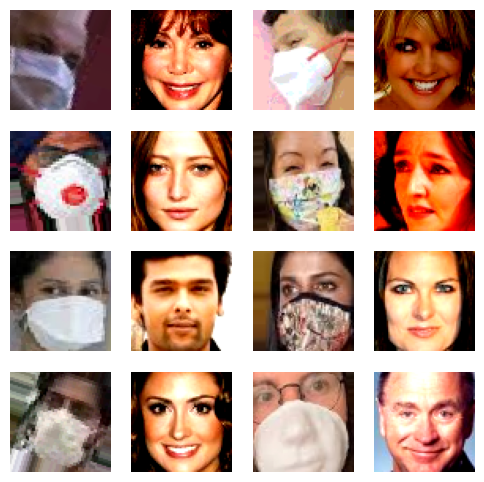

In [32]:
plt.figure(figsize=(6,6))
k=0
n=16
for i in range(n):
    ax=plt.subplot(4,4,k+1)
    if i%2==0:
        plt.imshow((d_masked[i]+1)/2)
    if i%2!=0:
        plt.imshow((d_unmasked[i]+1/2))
    plt.axis("off")
    k+=1
        

This code visualizes a grid of 16 images from a batch, alternating between masked and unmasked samples. It uses matplotlib to display them in a 4×4 layout, rescaling pixel values from the normalized range back to [0, 1] for proper rendering.


In [ ]:
def downsample(filters, kernel_size,apply_instance_norm=True,n_strides=2):
    model = tf.keras.Sequential()
    model.add(
        Conv2D(filters, kernel_size, strides=n_strides, padding='same',  
               kernel_initializer=tf.keras.initializers.RandomNormal(0., 0.02),
               use_bias=False)) 
    if apply_instance_norm:
      model.add(tfa.layers.InstanceNormalization())
    model.add(LeakyReLU(0.2))

    return model

def upsample(filters, kernel_size):
    model = tf.keras.Sequential([
        Conv2DTranspose(filters, kernel_size, strides=2, padding='same',  
                        kernel_initializer=tf.keras.initializers.RandomNormal(0., 0.02),
                        use_bias=False),
        tfa.layers.InstanceNormalization(),
        LeakyReLU(0.2),
    ])
    return model

def generator():
    input = Input(shape=(IM_SHAPE[0], IM_SHAPE[1], 3))
    x = input
    store = []

    # Downsampling
    for filters in [32, 64, 128, 256, 512,]:
        x = downsample(filters, 4)(x)
        store.append(x)

    # Upsampling
    for filters in [512, 256, 128, 64, 3]:
        x = tf.concat([x, store.pop()], axis=-1)
        x = upsample(filters, 4)(x)
    
    x=Conv2DTranspose(3,4,strides=1,padding='same',
                      kernel_initializer=tf.keras.initializers.RandomNormal(0.,0.02),activation='tanh',)(x)

    model = tf.keras.Model(inputs=input, outputs=x, name='unet_generator')
    return model

# Show model summary
generator().summary()

Model: "unet_generator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 32, 32, 32)           1600      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 16, 16, 64)           32896     ['sequential_2[0][0]']        
                                                                                                  
 sequential_4 (Sequential)   (None, 8, 8, 128)            131328    ['sequential_3[0][0]']        
                                                                                     

This code defines a U-Net style generator model using TensorFlow and Keras, commonly used for image-to-image translation tasks such as mask removal or image restoration.


In [34]:
def discriminator():
    input=Input((IM_SHAPE[0],IM_SHAPE[1],3))
    x=input
    x=downsample(32,4,apply_instance_norm=False)(x)
    x=downsample(64,4,apply_instance_norm=True)(x)
    x=downsample(128,4,apply_instance_norm=True)(x)
    x=downsample(256,4,apply_instance_norm=True)(x)
    x=downsample(256,4,apply_instance_norm=True,n_strides=1)(x)
    x=Conv2D(1,4,strides=1,padding='same',kernel_initializer=tf.keras.initializers.RandomNormal(0.,0.02),)(x)
    model=tf.keras.Model(input,x,name='discriminator')
    return model

This code defines a PatchGAN-style discriminator model, commonly used in GANs for image-to-image tasks.


In [35]:
discriminator().summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential_12 (Sequential)  (None, 32, 32, 32)        1536      
                                                                 
 sequential_13 (Sequential)  (None, 16, 16, 64)        32896     
                                                                 
 sequential_14 (Sequential)  (None, 8, 8, 128)         131328    
                                                                 
 sequential_15 (Sequential)  (None, 4, 4, 256)         524800    
                                                                 
 sequential_16 (Sequential)  (None, 4, 4, 256)         1049088   
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 1)         

In [36]:
generator_masked_unmasked=generator()
generator_unmasked_masked=generator()

discriminator_unmasked=discriminator()
discriminator_masked=discriminator()

In [ ]:
class CycleGAN(tf.keras.Model):
    def __init__(self, discriminator_unmasked, discriminator_masked,
                 generator_masked_unmasked, generator_unmasked_masked):
        super(CycleGAN, self).__init__()
        self.discriminator_unmasked = discriminator_unmasked
        self.discriminator_masked = discriminator_masked
        self.generator_masked_unmasked = generator_masked_unmasked
        self.generator_unmasked_masked = generator_unmasked_masked

        # Metrics
        self.d_loss_masked = tf.keras.metrics.Mean(name="d_loss_masked")
        self.d_loss_unmasked = tf.keras.metrics.Mean(name="d_loss_unmasked")
        self.g_loss_masked = tf.keras.metrics.Mean(name="g_loss_masked")
        self.g_loss_unmasked = tf.keras.metrics.Mean(name="g_loss_unmasked")

    def compile(self,
                d_optimizer_unmasked,
                d_optimizer_masked,
                g_optimizer_masked_unmasked,
                g_optimizer_unmasked_masked,
                discriminator_loss_fn,
                generator_loss_fn,
                cycle_loss_fn,
                lambda_cycle):
        super(CycleGAN, self).compile(
            optimizer=d_optimizer_unmasked,  # for Keras internal tracking
            loss=discriminator_loss_fn       # not used, but required
        )
        self.d_optimizer_unmasked = d_optimizer_unmasked
        self.d_optimizer_masked = d_optimizer_masked
        self.g_optimizer_masked_unmasked = g_optimizer_masked_unmasked
        self.g_optimizer_unmasked_masked = g_optimizer_unmasked_masked

        self.discriminator_loss_fn = discriminator_loss_fn
        self.generator_loss_fn = generator_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.lambda_cycle = lambda_cycle

    def train_step(self, real_images):
        real_masked, real_unmasked = real_images

        #Discriminator update
        fake_unmasked = self.generator_masked_unmasked(real_masked)
        fake_masked = self.generator_unmasked_masked(real_unmasked)

        with tf.GradientTape(persistent=True) as tape:
            # Discriminator A (unmasked)
            real_unmasked_pred = self.discriminator_unmasked(real_unmasked)
            fake_unmasked_pred = self.discriminator_unmasked(fake_unmasked)
            d_loss_unmasked = self.discriminator_loss_fn(real_unmasked_pred, fake_unmasked_pred)

            # Discriminator B (masked)
            real_masked_pred = self.discriminator_masked(real_masked)
            fake_masked_pred = self.discriminator_masked(fake_masked)
            d_loss_masked = self.discriminator_loss_fn(real_masked_pred, fake_masked_pred)

        # Apply discriminator gradients
        d_grads_unmasked = tape.gradient(d_loss_unmasked, self.discriminator_unmasked.trainable_weights)
        self.d_optimizer_unmasked.apply_gradients(zip(d_grads_unmasked, self.discriminator_unmasked.trainable_weights))

        d_grads_masked = tape.gradient(d_loss_masked, self.discriminator_masked.trainable_weights)
        self.d_optimizer_masked.apply_gradients(zip(d_grads_masked, self.discriminator_masked.trainable_weights))

        del tape  # Free persistent tape

        #Generator update 
        with tf.GradientTape(persistent=True) as tape:
            fake_unmasked = self.generator_masked_unmasked(real_masked)
            cycled_masked = self.generator_unmasked_masked(fake_unmasked)

            fake_masked = self.generator_unmasked_masked(real_unmasked)
            cycled_unmasked = self.generator_masked_unmasked(fake_masked)

            # Generator adversarial loss
            fake_unmasked_pred = self.discriminator_unmasked(fake_unmasked)
            g_loss_unmasked = self.generator_loss_fn(fake_unmasked_pred)

            fake_masked_pred = self.discriminator_masked(fake_masked)
            g_loss_masked = self.generator_loss_fn(fake_masked_pred)

            # Cycle consistency loss
            cycle_loss = (
                self.cycle_loss_fn(real_masked, cycled_masked) +
                self.cycle_loss_fn(real_unmasked, cycled_unmasked)
            ) * self.lambda_cycle

            g_loss_total_masked = g_loss_masked + cycle_loss
            g_loss_total_unmasked = g_loss_unmasked + cycle_loss

        # Apply generator gradients
        g_grads_masked = tape.gradient(g_loss_total_masked, self.generator_unmasked_masked.trainable_weights)
        self.g_optimizer_unmasked_masked.apply_gradients(zip(g_grads_masked, self.generator_unmasked_masked.trainable_weights))

        g_grads_unmasked = tape.gradient(g_loss_total_unmasked, self.generator_masked_unmasked.trainable_weights)
        self.g_optimizer_masked_unmasked.apply_gradients(zip(g_grads_unmasked, self.generator_masked_unmasked.trainable_weights))

        del tape  # Free persistent tape

        # Update metrics
        self.d_loss_masked.update_state(d_loss_masked)
        self.d_loss_unmasked.update_state(d_loss_unmasked)
        self.g_loss_masked.update_state(g_loss_total_masked)
        self.g_loss_unmasked.update_state(g_loss_total_unmasked)

        return {
            "d_loss_masked": self.d_loss_masked.result(),
            "d_loss_unmasked": self.d_loss_unmasked.result(),
            "g_loss_masked": self.g_loss_masked.result(),
            "g_loss_unmasked": self.g_loss_unmasked.result()
        }


This class defines a custom CycleGAN model using TensorFlow, designed to learn bidirectional image translation between masked and unmasked faces without paired data. This architecture enables unpaired image-to-image translation by training the model to not only fool the discriminators but also to reconstruct the original images through cyclic consistency, reinforcing identity and structure across transformations.



In [38]:
def discriminator_loss_fn(real_predictions,fake_predictions):
    bce=tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss=bce(tf.ones_like(real_predictions),real_predictions)
    fake_loss=bce(tf.zeros_like(fake_predictions),fake_predictions)
    return 0.5*(real_loss+fake_loss)



In [39]:
def generator_loss_fn(fake_predictions):
    bce=tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return bce(tf.ones_like(fake_predictions),fake_predictions)
   



In [40]:
def cycle_loss_fn(fake_cycled_image,real_image):
    return tf.reduce_mean(tf.abs(fake_cycled_image-real_image))


These functions define the core loss components for training a CycleGAN:

discriminator_loss_fn computes how well the discriminator distinguishes real from fake images using binary cross-entropy, penalizing incorrect predictions from both sides.

generator_loss_fn encourages the generator to produce images that fool the discriminator into classifying them as real.

cycle_loss_fn enforces cycle consistency by minimizing the pixel-wise difference between the original image and its reconstruction after a forward–backward translation, helping preserve content and structure.



In [41]:
generator_optimizer=tf.keras.optimizers.Adam(1e-4,beta_1=0.5)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-4,beta_1=0.5)

These lines initialize Adam optimizers for both the generator and discriminator with a learning rate of 0.0001 and a momentum term beta_1=0.5, which helps stabilize GAN training by smoothing gradient updates and reducing oscillations.


In [42]:
cycle_gan=CycleGAN(discriminator_unmasked,discriminator_masked,generator_masked_unmasked,generator_unmasked_masked,)

In [43]:
cycle_gan.compile(
    d_optimizer_unmasked=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    d_optimizer_masked=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    g_optimizer_masked_unmasked=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    g_optimizer_unmasked_masked=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    discriminator_loss_fn=discriminator_loss_fn,
    generator_loss_fn=generator_loss_fn,
    cycle_loss_fn=tf.keras.losses.MeanAbsoluteError(),
    lambda_cycle=15
)


In [ ]:
!mkdir generated

In [ ]:
for d in ds_test_masked.take(1):
    test_masked=d

SyntaxError: incomplete input (3856981197.py, line 1)

In [ ]:
class Unmask(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        n=4
        k=0
        out=cycle_gan.generator_masked_unmasked(test_masked)
        plt.figure(figsize=(6,6))
        k=0
        n=16
        for i in range(n):
            ax=plt.subplot(4,4,k+1)
            if i%2==0:
                plt.imshow((test_masked[i]+1)/2)
            if i%2!=0:
                plt.imshow((out[i-1]+1)/2)
            plt.axis("off")
            k+=1
        plt.savefig("generated/gen_images_epoch_{}.png".format(epoch+1))
        

In [ ]:
cycle_gan.fit(train_dataset,epochs=1000,callbacks=[Unmask()])

Evaluation Phase:

In [ ]:
IM_SHAPE = (64, 64, 3)
LEARNING_RATE = 2e-4  # typical for GANs
seed = 1337
AUTOTUNE = tf.data.AUTOTUNE
print(tf.__version__)


2.15.0


In [ ]:
def preprocess(img):
    # Already RGB from the loader; just resize + [-1, 1]
    img = tf.image.resize(img, (IM_SHAPE[0], IM_SHAPE[1]))
    img = tf.cast(img, tf.float32) / 127.5 - 1.0
    return img

# === 80/20 split; force RGB at load time ===
train_masked = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted/Dataset/WithMask",
    label_mode=None,
    image_size=(IM_SHAPE[0], IM_SHAPE[1]),
    color_mode="rgb",         
    validation_split=0.2,
    subset="training",
    seed=seed,
    batch_size=BATCH_SIZE,
    interpolation="bilinear",
)

test_masked = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted/Dataset/WithMask",
    label_mode=None,
    image_size=(IM_SHAPE[0], IM_SHAPE[1]),
    color_mode="rgb",          
    validation_split=0.2,
    subset="validation",
    seed=seed,
    batch_size=BATCH_SIZE,
    interpolation="bilinear",
)

train_unmasked = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted/Dataset/WithoutMask",
    label_mode=None,
    image_size=(IM_SHAPE[0], IM_SHAPE[1]),
    color_mode="rgb",          
    validation_split=0.2,
    subset="training",
    seed=seed,
    batch_size=BATCH_SIZE,
    interpolation="bilinear",
)

test_unmasked = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted/Dataset/WithoutMask",
    label_mode=None,
    image_size=(IM_SHAPE[0], IM_SHAPE[1]),
    color_mode="rgb",          
    validation_split=0.2,
    subset="validation",
    seed=seed,
    batch_size=BATCH_SIZE,
    interpolation="bilinear",
)

def make_domain_ds(ds, shuffle=True):
    if shuffle:
        ds = ds.shuffle(8, seed=seed)
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    # Ensure static shape for Keras shape checks
    ds = ds.map(lambda x: tf.ensure_shape(x, (None, IM_SHAPE[0], IM_SHAPE[1], 3)))
    # (optional) skip any corrupt/odd samples without crashing
    ds = ds.apply(tf.data.experimental.ignore_errors())
    ds = ds.prefetch(AUTOTUNE)
    return ds

train_masked_ds   = make_domain_ds(train_masked, shuffle=True)
train_unmasked_ds = make_domain_ds(train_unmasked, shuffle=True)
test_masked_ds    = make_domain_ds(test_masked,  shuffle=False)
test_unmasked_ds  = make_domain_ds(test_unmasked,shuffle=False)

train_dataset = tf.data.Dataset.zip((train_masked_ds, train_unmasked_ds))
test_dataset  = tf.data.Dataset.zip((test_masked_ds,  test_unmasked_ds))

# Sanity check
for m, u in train_dataset.take(1):
    print("Train masked batch:", m.shape)    # (batch, 64, 64, 3)
    print("Train unmasked batch:", u.shape)  # (batch, 64, 64, 3)


Found 5000 files belonging to 1 classes.
Using 4000 files for training.
Found 5000 files belonging to 1 classes.
Using 1000 files for validation.
Found 5000 files belonging to 1 classes.
Using 4000 files for training.
Found 5000 files belonging to 1 classes.
Using 1000 files for validation.
Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.
Train masked batch: (128, 64, 64, 3)
Train unmasked batch: (128, 64, 64, 3)


In [48]:

bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss_fn(real_logits, fake_logits):
    real_loss = bce_logits(tf.ones_like(real_logits), real_logits)
    fake_loss = bce_logits(tf.zeros_like(fake_logits), fake_logits)
    return 0.5 * (real_loss + fake_loss)

def generator_loss_fn(fake_logits):
    return bce_logits(tf.ones_like(fake_logits), fake_logits)

def cycle_loss_fn(real_image, cycled_image):
    return tf.reduce_mean(tf.abs(real_image - cycled_image))

def disc_accuracy(real_logits, fake_logits):
    # Treat logits > 0 as "real" prediction
    real_pred = tf.cast(real_logits > 0.0, tf.float32)
    fake_pred = tf.cast(fake_logits <= 0.0, tf.float32)
    real_acc = tf.reduce_mean(real_pred)  # fraction predicted real correctly
    fake_acc = tf.reduce_mean(fake_pred)  # fraction predicted fake correctly
    return 0.5 * (real_acc + fake_acc)


In [49]:

class CycleGAN(tf.keras.Model):
    def __init__(self, D_U, D_M, G_M2U, G_U2M, lambda_cycle=15.0):
        super().__init__()
        self.discriminator_unmasked = D_U
        self.discriminator_masked   = D_M
        self.generator_masked_unmasked   = G_M2U
        self.generator_unmasked_masked   = G_U2M
        self.lambda_cycle = lambda_cycle

        # Train metrics
        self.d_loss_m = tf.keras.metrics.Mean(name="d_loss_masked")
        self.d_loss_u = tf.keras.metrics.Mean(name="d_loss_unmasked")
        self.g_loss_m = tf.keras.metrics.Mean(name="g_loss_masked")
        self.g_loss_u = tf.keras.metrics.Mean(name="g_loss_unmasked")
        self.disc_acc = tf.keras.metrics.Mean(name="disc_acc")

        # Test metrics
        self.val_d_loss_m = tf.keras.metrics.Mean(name="val_d_loss_masked")
        self.val_d_loss_u = tf.keras.metrics.Mean(name="val_d_loss_unmasked")
        self.val_g_loss_m = tf.keras.metrics.Mean(name="val_g_loss_masked")
        self.val_g_loss_u = tf.keras.metrics.Mean(name="val_g_loss_unmasked")
        self.val_disc_acc = tf.keras.metrics.Mean(name="val_disc_acc")

    def compile(self, d_opt_u, d_opt_m, g_opt_m2u, g_opt_u2m,
                disc_loss_fn, gen_loss_fn, cyc_loss_fn, lambda_cycle=15.0):
        super().compile(run_eagerly=False)
        self.d_opt_u, self.d_opt_m = d_opt_u, d_opt_m
        self.g_opt_m2u, self.g_opt_u2m = g_opt_m2u, g_opt_u2m
        self.disc_loss_fn = disc_loss_fn
        self.gen_loss_fn  = gen_loss_fn
        self.cyc_loss_fn  = cyc_loss_fn
        self.lambda_cycle = lambda_cycle

    def train_step(self, data):
        real_m, real_u = data

        # --- Discriminator update ---
        fake_u = self.generator_masked_unmasked(real_m, training=True)
        fake_m = self.generator_unmasked_masked(real_u, training=True)

        with tf.GradientTape(persistent=True) as tape:
            ru_logits = self.discriminator_unmasked(real_u, training=True)
            fu_logits = self.discriminator_unmasked(fake_u, training=True)
            d_u = self.disc_loss_fn(ru_logits, fu_logits)

            rm_logits = self.discriminator_masked(real_m, training=True)
            fm_logits = self.discriminator_masked(fake_m, training=True)
            d_m = self.disc_loss_fn(rm_logits, fm_logits)

        d_grads_u = tape.gradient(d_u, self.discriminator_unmasked.trainable_weights)
        self.d_opt_u.apply_gradients(zip(d_grads_u, self.discriminator_unmasked.trainable_weights))

        d_grads_m = tape.gradient(d_m, self.discriminator_masked.trainable_weights)
        self.d_opt_m.apply_gradients(zip(d_grads_m, self.discriminator_masked.trainable_weights))
        del tape

        # --- Generator update ---
        with tf.GradientTape(persistent=True) as tape:
            fake_u = self.generator_masked_unmasked(real_m, training=True)
            cycled_m = self.generator_unmasked_masked(fake_u, training=True)

            fake_m = self.generator_unmasked_masked(real_u, training=True)
            cycled_u = self.generator_masked_unmasked(fake_m, training=True)

            fu_logits = self.discriminator_unmasked(fake_u, training=True)
            fm_logits = self.discriminator_masked(fake_m, training=True)

            g_u = self.gen_loss_fn(fu_logits)
            g_m = self.gen_loss_fn(fm_logits)

            c_loss = (self.cyc_loss_fn(real_m, cycled_m) + self.cyc_loss_fn(real_u, cycled_u)) * self.lambda_cycle

            g_total_m = g_m + c_loss
            g_total_u = g_u + c_loss

        g_grads_m = tape.gradient(g_total_m, self.generator_unmasked_masked.trainable_weights)
        self.g_opt_u2m.apply_gradients(zip(g_grads_m, self.generator_unmasked_masked.trainable_weights))

        g_grads_u = tape.gradient(g_total_u, self.generator_masked_unmasked.trainable_weights)
        self.g_opt_m2u.apply_gradients(zip(g_grads_u, self.generator_masked_unmasked.trainable_weights))
        del tape

        # --- Metrics ---
        acc = 0.5 * (disc_accuracy(ru_logits, fu_logits) + disc_accuracy(rm_logits, fm_logits))
        self.d_loss_m.update_state(d_m)
        self.d_loss_u.update_state(d_u)
        self.g_loss_m.update_state(g_total_m)
        self.g_loss_u.update_state(g_total_u)
        self.disc_acc.update_state(acc)

        return {
            "d_loss_masked": self.d_loss_m.result(),
            "d_loss_unmasked": self.d_loss_u.result(),
            "g_loss_masked": self.g_loss_m.result(),
            "g_loss_unmasked": self.g_loss_u.result(),
            "disc_acc": self.disc_acc.result(),
        }

    def test_step(self, data):
        real_m, real_u = data

        fake_u = self.generator_masked_unmasked(real_m, training=False)
        fake_m = self.generator_unmasked_masked(real_u, training=False)

        ru_logits = self.discriminator_unmasked(real_u, training=False)
        fu_logits = self.discriminator_unmasked(fake_u, training=False)
        d_u = self.disc_loss_fn(ru_logits, fu_logits)

        rm_logits = self.discriminator_masked(real_m, training=False)
        fm_logits = self.discriminator_masked(fake_m, training=False)
        d_m = self.disc_loss_fn(rm_logits, fm_logits)

        g_u = self.gen_loss_fn(fu_logits)
        g_m = self.gen_loss_fn(fm_logits)

        cycled_m = self.generator_unmasked_masked(fake_u, training=False)
        cycled_u = self.generator_masked_unmasked(fake_m, training=False)
        c_loss = (self.cyc_loss_fn(real_m, cycled_m) + self.cyc_loss_fn(real_u, cycled_u)) * self.lambda_cycle

        g_total_m = g_m + c_loss
        g_total_u = g_u + c_loss

        acc = 0.5 * (disc_accuracy(ru_logits, fu_logits) + disc_accuracy(rm_logits, fm_logits))

        self.val_d_loss_m.update_state(d_m)
        self.val_d_loss_u.update_state(d_u)
        self.val_g_loss_m.update_state(g_total_m)
        self.val_g_loss_u.update_state(g_total_u)
        self.val_disc_acc.update_state(acc)

        return {
            "val_d_loss_masked": self.val_d_loss_m.result(),
            "val_d_loss_unmasked": self.val_d_loss_u.result(),
            "val_g_loss_masked": self.val_g_loss_m.result(),
            "val_g_loss_unmasked": self.val_g_loss_u.result(),
            "val_disc_acc": self.val_disc_acc.result(),
        }


Epoch 1/100


2025-08-21 19:48:46.255836: W external/local_tsl/tsl/framework/bfc_allocator.cc:366] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


     32/Unknown - 55s 450ms/step - d_loss_masked: 0.6416 - d_loss_unmasked: 0.5511 - g_loss_masked: 13.6166 - g_loss_unmasked: 13.9807 - disc_acc: 0.7980Available log keys: ['d_loss_masked', 'd_loss_unmasked', 'disc_acc', 'g_loss_masked', 'g_loss_unmasked', 'val_val_d_loss_masked', 'val_val_d_loss_unmasked', 'val_val_disc_acc', 'val_val_g_loss_masked', 'val_val_g_loss_unmasked']
32/32 [==============================] - 63s 734ms/step - d_loss_masked: 0.6416 - d_loss_unmasked: 0.5511 - g_loss_masked: 13.6166 - g_loss_unmasked: 13.9807 - disc_acc: 0.7980 - val_val_d_loss_masked: 0.5583 - val_val_d_loss_unmasked: 0.4076 - val_val_g_loss_masked: 12.1716 - val_val_g_loss_unmasked: 12.5348 - val_val_disc_acc: 0.7718
Epoch 2/100
32/32 [==============================] - 15s 432ms/step - d_loss_masked: 0.4452 - d_loss_unmasked: 0.2655 - g_loss_masked: 12.0665 - g_loss_unmasked: 12.7476 - disc_acc: 0.8985 - val_val_d_loss_masked: 0.3488 - val_val_d_loss_unmasked: 0.5404 - val_val_g_loss_masked: 

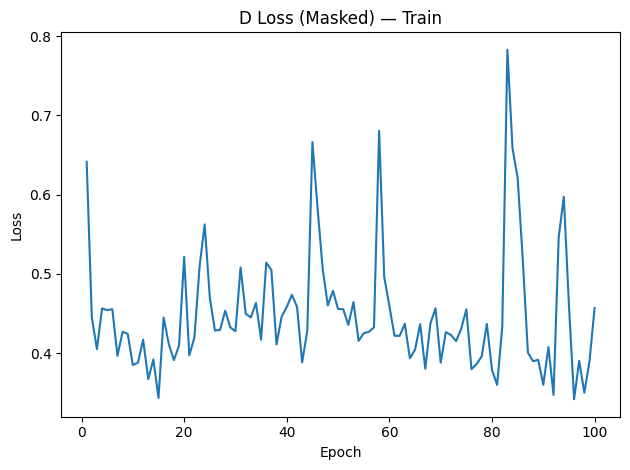

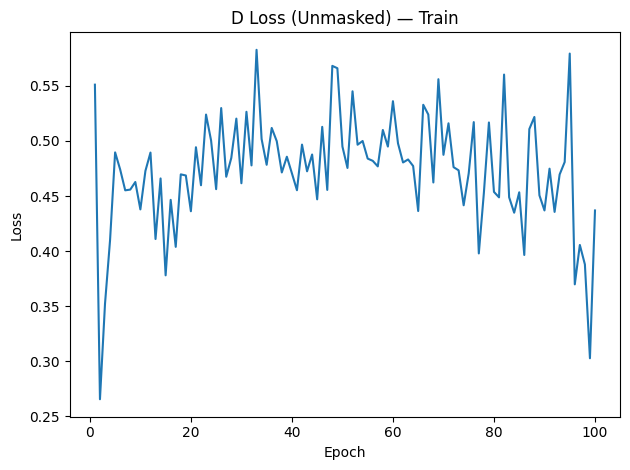

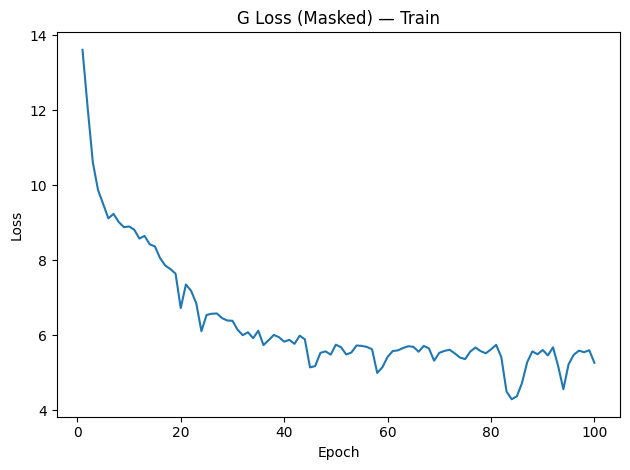

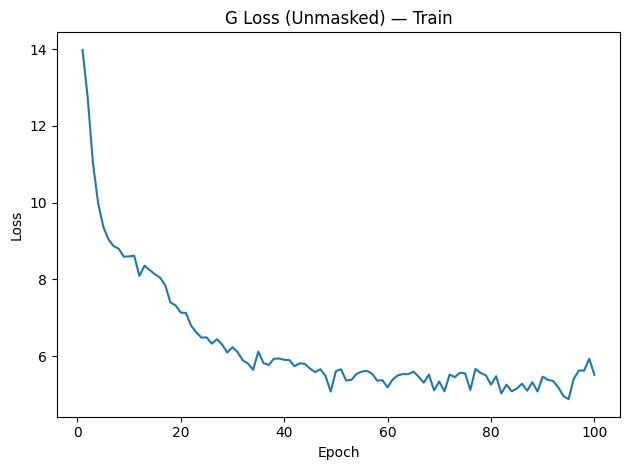

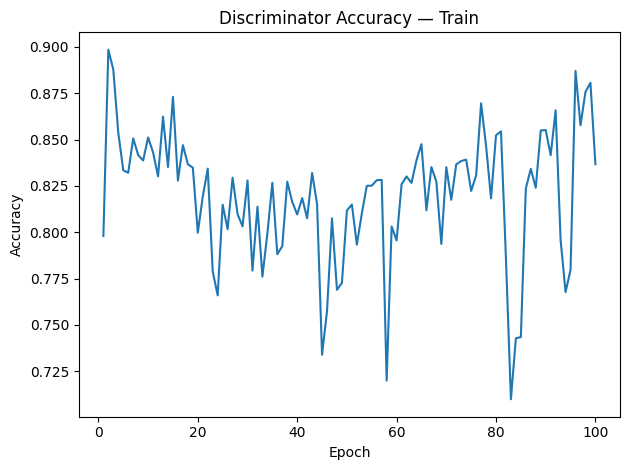

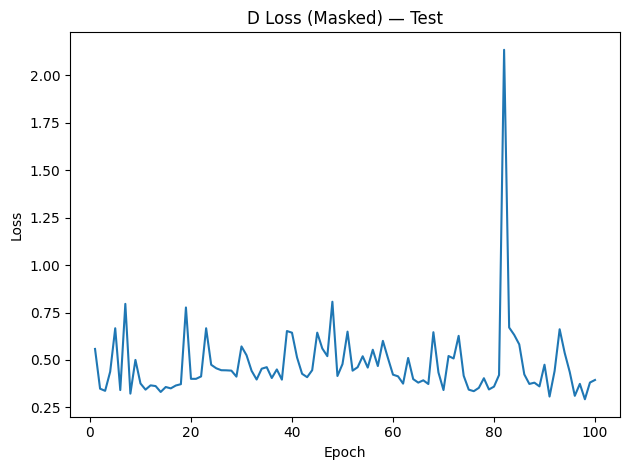

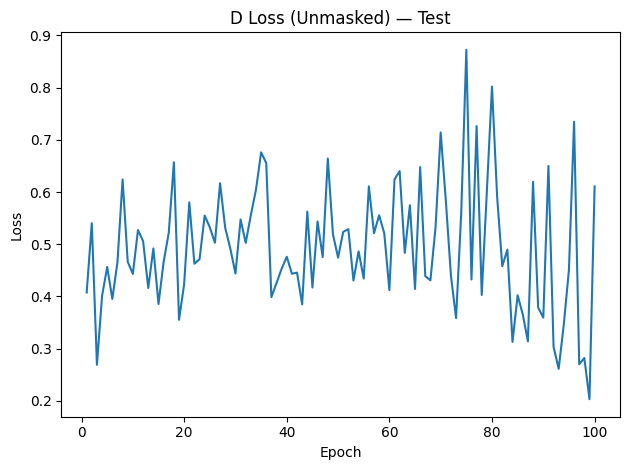

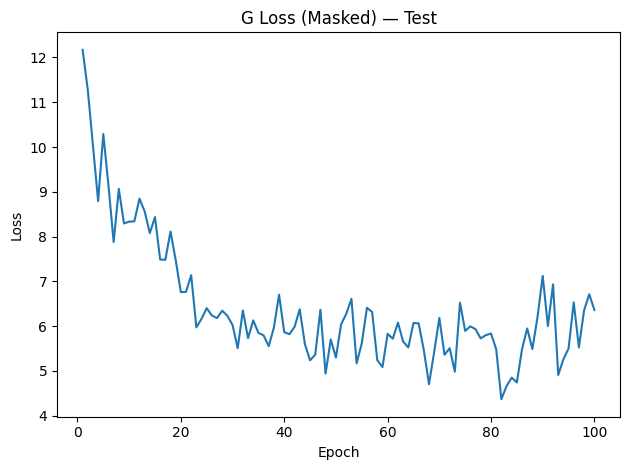

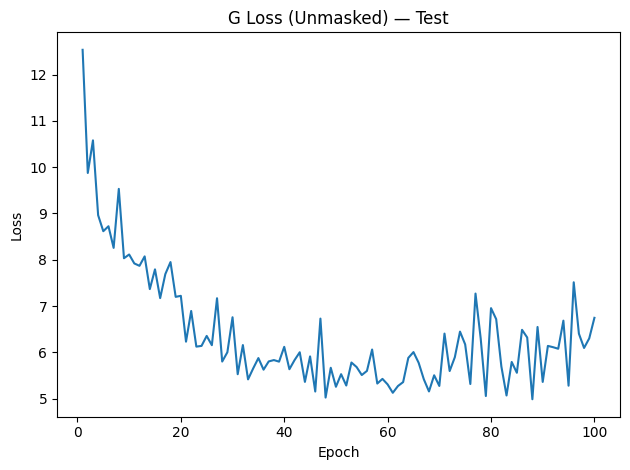

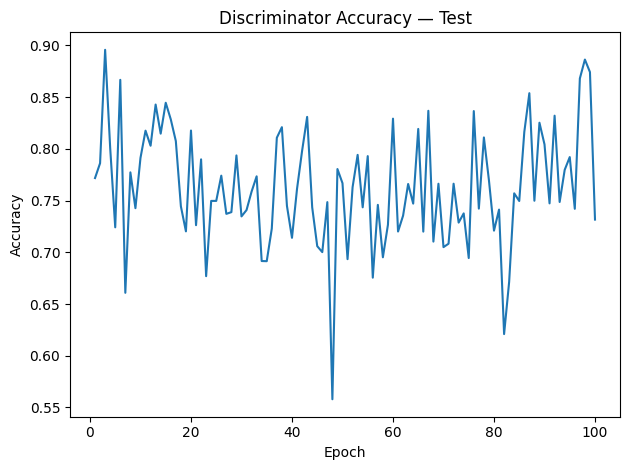

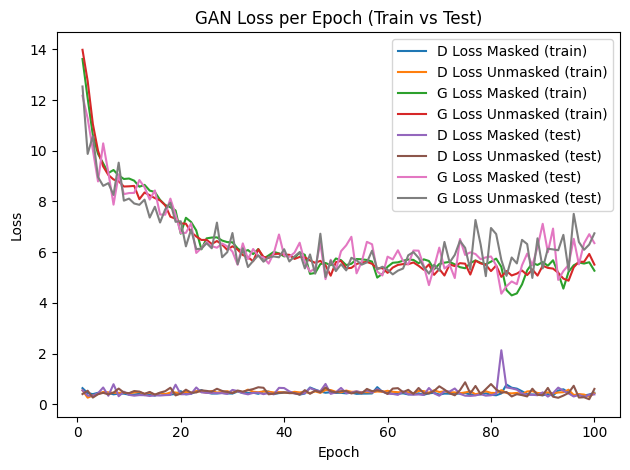

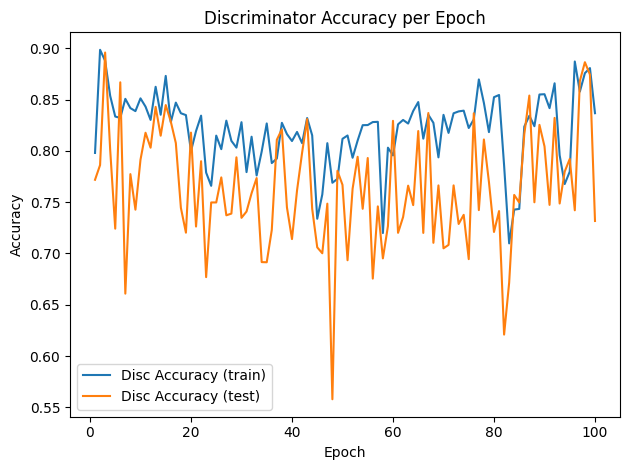

In [50]:
# === Imports (safe if repeated) ===
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# ========= History logger with robust keys (incl. disc acc train & test) =========
class HistoryLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.hist = {k: [] for k in [
            "d_loss_masked","d_loss_unmasked","g_loss_masked","g_loss_unmasked","disc_acc",
            "val_d_loss_masked","val_d_loss_unmasked","val_g_loss_masked","val_g_loss_unmasked","val_disc_acc"
        ]}
        # Allow for odd naming like val_val_*
        self.aliases = {
            "d_loss_masked":        ["d_loss_masked","train_d_loss_masked"],
            "d_loss_unmasked":      ["d_loss_unmasked","train_d_loss_unmasked"],
            "g_loss_masked":        ["g_loss_masked","train_g_loss_masked"],
            "g_loss_unmasked":      ["g_loss_unmasked","train_g_loss_unmasked"],
            "disc_acc":             ["disc_acc","train_disc_acc"],

            "val_d_loss_masked":    ["val_d_loss_masked","val_val_d_loss_masked"],
            "val_d_loss_unmasked":  ["val_d_loss_unmasked","val_val_d_loss_unmasked"],
            "val_g_loss_masked":    ["val_g_loss_masked","val_val_g_loss_masked"],
            "val_g_loss_unmasked":  ["val_g_loss_unmasked","val_val_g_loss_unmasked"],
            "val_disc_acc":         ["val_disc_acc","val_val_disc_acc"],
        }
        self._printed_keys = False

    def _coerce_float(self, v):
        try:
            return float(v)
        except Exception:
            try:
                return float(tf.keras.backend.get_value(v))
            except Exception:
                return None

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if not self._printed_keys:
            print("Available log keys:", sorted(list(logs.keys())))
            self._printed_keys = True
        for target_key, candidates in self.aliases.items():
            for c in candidates:
                if c in logs and logs[c] is not None:
                    val = self._coerce_float(logs[c])
                    if val is not None:
                        self.hist[target_key].append(val)
                    break  # stop at first match

    # Combined overlays (train+test on same figure)
    def plot(self):
        epochs = range(1, len(self.hist["d_loss_masked"]) + 1)
        # Losses
        plt.figure()
        plt.plot(epochs, self.hist["d_loss_masked"],   label="D Loss Masked (train)")
        plt.plot(epochs, self.hist["d_loss_unmasked"], label="D Loss Unmasked (train)")
        plt.plot(epochs, self.hist["g_loss_masked"],   label="G Loss Masked (train)")
        plt.plot(epochs, self.hist["g_loss_unmasked"], label="G Loss Unmasked (train)")
        if self.hist["val_d_loss_masked"]:
            plt.plot(epochs, self.hist["val_d_loss_masked"],   label="D Loss Masked (test)")
            plt.plot(epochs, self.hist["val_d_loss_unmasked"], label="D Loss Unmasked (test)")
            plt.plot(epochs, self.hist["val_g_loss_masked"],   label="G Loss Masked (test)")
            plt.plot(epochs, self.hist["val_g_loss_unmasked"], label="G Loss Unmasked (test)")
        plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("GAN Loss per Epoch (Train vs Test)")
        plt.legend(); plt.tight_layout(); plt.show()

        # Disc accuracy
        plt.figure()
        plt.plot(epochs, self.hist["disc_acc"], label="Disc Accuracy (train)")
        if self.hist["val_disc_acc"]:
            plt.plot(epochs, self.hist["val_disc_acc"], label="Disc Accuracy (test)")
        plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Discriminator Accuracy per Epoch")
        plt.legend(); plt.tight_layout(); plt.show()

    # Separate figures for each metric & split
    def plot_separate(self):
        def _plot_single(values, title, ylabel):
            if not values:
                return
            epochs = range(1, len(values) + 1)
            plt.figure()
            plt.plot(epochs, values)
            plt.xlabel("Epoch"); plt.ylabel(ylabel); plt.title(title)
            plt.tight_layout(); plt.show()

        # Train
        _plot_single(self.hist["d_loss_masked"],   "D Loss (Masked) — Train",   "Loss")
        _plot_single(self.hist["d_loss_unmasked"], "D Loss (Unmasked) — Train", "Loss")
        _plot_single(self.hist["g_loss_masked"],   "G Loss (Masked) — Train",   "Loss")
        _plot_single(self.hist["g_loss_unmasked"], "G Loss (Unmasked) — Train", "Loss")
        _plot_single(self.hist["disc_acc"],        "Discriminator Accuracy — Train", "Accuracy")

        # Test
        _plot_single(self.hist["val_d_loss_masked"],   "D Loss (Masked) — Test",   "Loss")
        _plot_single(self.hist["val_d_loss_unmasked"], "D Loss (Unmasked) — Test", "Loss")
        _plot_single(self.hist["val_g_loss_masked"],   "G Loss (Masked) — Test",   "Loss")
        _plot_single(self.hist["val_g_loss_unmasked"], "G Loss (Unmasked) — Test", "Loss")
        _plot_single(self.hist["val_disc_acc"],        "Discriminator Accuracy — Test", "Accuracy")


# ========= SaveSamples (unchanged) =========
class SaveSamples(tf.keras.callbacks.Callback):
    def __init__(self, sample_batch, outdir="generated"):
        super().__init__()
        self.sample = sample_batch
        self.outdir = outdir
        os.makedirs(outdir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        gen = self.model.generator_masked_unmasked
        out = gen(self.sample, training=False)
        n = min(8, out.shape[0])
        plt.figure(figsize=(6,6))
        k = 1
        for i in range(n * 2):
            ax = plt.subplot(4,4,k)
            img = (self.sample[i//2] + 1.0) / 2.0 if i % 2 == 0 else (out[i//2] + 1.0) / 2.0
            plt.imshow(tf.clip_by_value(img, 0.0, 1.0)); plt.axis("off"); k += 1
        plt.tight_layout()
        fp = os.path.join(self.outdir, f"gen_epoch_{epoch+1}.png")
        plt.savefig(fp); plt.close()


# ========= Safety checks & defaults =========
try:
    generator_masked_unmasked
    generator_unmasked_masked
except NameError:
    raise RuntimeError("Define `generator_masked_unmasked` & `generator_unmasked_masked` before running.")

try:
    discriminator_unmasked
    discriminator_masked
except NameError:
    raise RuntimeError("Define `discriminator_unmasked` & `discriminator_masked` before running.")

try:
    LEARNING_RATE
except NameError:
    LEARNING_RATE = 2e-4

# ========= Build & compile =========
cycle_gan = CycleGAN(discriminator_unmasked, discriminator_masked,
                     generator_masked_unmasked, generator_unmasked_masked, lambda_cycle=15.0)

cycle_gan.compile(
    d_opt_u=tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=0.5),
    d_opt_m=tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=0.5),
    g_opt_m2u=tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=0.5),
    g_opt_u2m=tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=0.5),
    disc_loss_fn=discriminator_loss_fn,
    gen_loss_fn=generator_loss_fn,
    cyc_loss_fn=cycle_loss_fn,
    lambda_cycle=15.0
)

# ========= Train =========
val_masked_batch = next(iter(test_masked_ds))
hist = HistoryLogger()
samples = SaveSamples(val_masked_batch)

history = cycle_gan.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,                            # adjust as needed
    callbacks=[hist, samples]
)

# ========= Plots =========
# Separate figures for each metric (train & test, including disc accuracy)
hist.plot_separate()
# Optional: combined overlays
hist.plot()


In [ ]:
import tensorflow as tf
import json

# ===== SSIM helpers =====
def _to01(x: tf.Tensor) -> tf.Tensor:
    """Map [-1,1] → [0,1] if needed; otherwise pass-through, then clamp."""
    x = tf.cast(x, tf.float32)
    cond = tf.logical_and(tf.reduce_min(x) >= -1.0, tf.reduce_max(x) <= 1.0)
    x = tf.where(cond, (x + 1.0) * 0.5, x)
    return tf.clip_by_value(x, 0.0, 1.0)

def ssim_batch_tf(x: tf.Tensor, y: tf.Tensor) -> tf.Tensor:
    """Mean SSIM over a batch (scalar)."""
    x01, y01 = _to01(x), _to01(y)
    vals = tf.image.ssim(x01, y01, max_val=1.0)  # shape: (B,)
    return tf.reduce_mean(vals)

# ===== Cycle-SSIM evaluator =====
@tf.function(jit_compile=False)
def _forward_once(G, x):
    return G(x, training=False)

def compute_cycle_ssim(G_AB, G_BA, ds_A, ds_B, max_batches=None):
    """
    G_AB: masked -> unmasked generator
    G_BA: unmasked -> masked generator
    ds_A: dataset of masked faces (batches, in [-1,1] from your preprocess)
    ds_B: dataset of unmasked faces
    max_batches: int or None — limit for speed
    Returns: dict with A/B/overall SSIM
    """
 
    a_vals = []
    for i, a in enumerate(ds_A):
        if (max_batches is not None) and (i >= max_batches): break
        b_hat = _forward_once(G_AB, a)
        a_hat = _forward_once(G_BA, b_hat)
        a_vals.append(ssim_batch_tf(a, a_hat))
    ssim_a = tf.reduce_mean(a_vals) if a_vals else tf.constant(0.0, tf.float32)

    
    b_vals = []
    for i, b in enumerate(ds_B):
        if (max_batches is not None) and (i >= max_batches): break
        a_hat = _forward_once(G_BA, b)
        b_hat = _forward_once(G_AB, a_hat)
        b_vals.append(ssim_batch_tf(b, b_hat))
    ssim_b = tf.reduce_mean(b_vals) if b_vals else tf.constant(0.0, tf.float32)

    overall = (ssim_a + ssim_b) / 2.0
    out = {
        "cycle_ssim_masked": float(ssim_a.numpy()),
        "cycle_ssim_unmasked": float(ssim_b.numpy()),
        "cycle_ssim_overall": float(overall.numpy()),
        "batches_evaluated_A": len(a_vals),
        "batches_evaluated_B": len(b_vals),
    }
    print(json.dumps(out, indent=2))
    return out


try:
    G_AB = getattr(cycle_gan, "generator_masked_unmasked")      
    G_BA = getattr(cycle_gan, "generator_unmasked_masked")      
except Exception as e:
    raise RuntimeError(
        "Could not find generators on `cycle_gan`. "
        "Set G_AB (masked->unmasked) and G_BA (unmasked->masked) manually."
    ) from e


ssim_scores = compute_cycle_ssim(
    G_AB, G_BA,
    ds_A=test_masked_ds,
    ds_B=test_unmasked_ds,
    max_batches=20   
)


{
  "cycle_ssim_masked": 0.6536831259727478,
  "cycle_ssim_unmasked": 0.7462021112442017,
  "cycle_ssim_overall": 0.6999425888061523,
  "batches_evaluated_A": 8,
  "batches_evaluated_B": 8
}
